### Module 3 Lab 2 

1. Load the dataset bike_day_raw.csv, which has the regression target cnt. This dataset is hourly bike rentals in the citybike platform. The cnt column is the number of rentals, which we want to predict from date and weather data.

- Split the data into a training and a test set using train_test_split. 

- Use the LinearRegression class to learn a regression model on this data. 

- You can evaluate with the score method, which provides the R^2or using the mean_squared_error function from sklearn.metrics (Challenge: You can also write it yourself in numpy).


In [4]:
import pandas as pd
bikeday_raw = pd.read_csv('data/bike_day_raw.csv')
y = bikeday_raw.pop(bikeday_raw.columns[-1])
X = bikeday_raw
display(X)
categ_vars = ['weathersit', 'holiday', 'workingday']
time_vars = ['season', 'mnth', 'weekday']
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def get_MSE(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise ValueError("y_true and y_pred must have the same number of observations")
    else: n = len(y_true)
    return (((y_pred - y_true)**2).sum())/n

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LinearRegression().fit(X_train, y_train)
lrscore = lr.score(X_test, y_test)
print('R Squared: ', lrscore)

mse = get_MSE(y_test, lr.predict(X_test))
print('Mean Squared Error: ', mse)

R Squared:  0.5076854569828537
Mean Squared Error:  1978697.067491957


In [42]:
# in case binary categorical variables are needed:
Xmod = pd.get_dummies(X, columns=['weathersit'])
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xmod, y)
lr2 = LinearRegression().fit(X_train2, y_train2)
lrscore = lr2.score(X_test2, y_test2)
print('R Squared: ', lrscore)

mse = get_MSE(y_test, lr2.predict(X_test2))
print('Mean Squared Error: ', mse)

R Squared:  0.49132684296814944
Mean Squared Error:  6634862.042835371


2. Load the diabetes dataset using sklearn.datasets.load_diabetes.
- Scale the dataset (you can be creative and make pipelines)
- Apply LinearRegression, 
- Apply Ridge and do grid search 
- Apply Lasso and do grid search
- Visualize the coefficients.


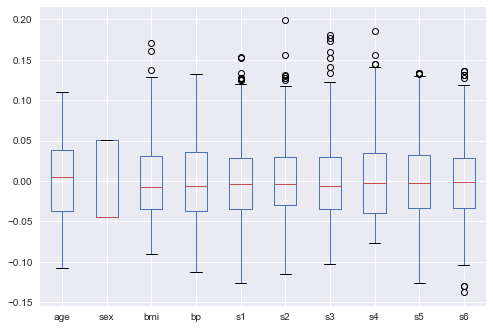

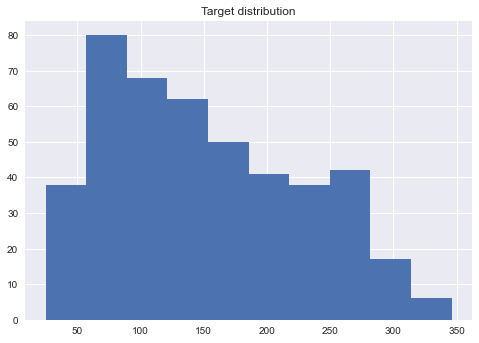

In [127]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

diabetes = load_diabetes(as_frame=True)
X, y = diabetes.data, diabetes.target
X.boxplot()

plt.figure()
plt.title("Target distribution")
plt.hist(y, bins="auto")
plt.show()

<AxesSubplot:>

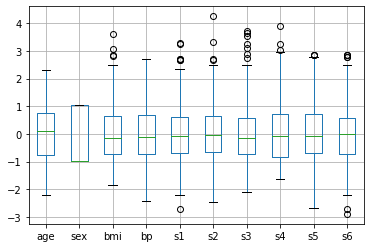

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled, columns=X.columns).boxplot()

In [65]:
lr = LinearRegression().fit(X_train_scaled, y_train)
lr_scores = cross_val_score(lr, X_train_scaled, y_train, cv=10)
print("Linear reg. cross val mean score = ", np.mean(lr_scores))

Linear reg. cross val mean score =  0.44941430115394276


In [89]:
rdg_scores = cross_val_score(Ridge(), X_train_scaled, y_train, cv=10)
print("Ridge cross val mean score = ", np.mean(rdg_scores))

param_grid = {'alpha': np.logspace(-3, 3, 14)}
grid = GridSearchCV(Ridge(), param_grid=param_grid, return_train_score=True, cv=10)
grid.fit(X_train_scaled, y_train)
rdg_best = grid.best_estimator_

ridge_res = pd.DataFrame(grid.cv_results_)[['param_alpha','mean_train_score', 'mean_test_score']]
display(ridge_res)

Ridge cross val mean score =  0.4512330239498469


,param_alpha,mean_train_score,mean_test_score
0,0.001,0.517710,0.449417
1,0.002894,0.517710,0.449423
2,0.008377,0.517709,0.449440
3,0.024245,0.517709,0.449488
4,0.07017,0.517706,0.449620
5,0.203092,0.517680,0.449964
6,0.587802,0.517526,0.450704
7,1.701254,0.516896,0.451805
8,4.923883,0.515533,0.452849
9,14.251027,0.513700,0.453745


c:\Coding\conda\envs\datsci\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


<AxesSubplot:xlabel='param_alpha'>

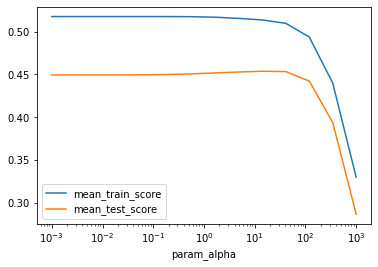

In [82]:
ridge_res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)

In [90]:
las_scores = cross_val_score(Lasso(), X_train_scaled, y_train, cv=10)
print("Lasso cross val mean score = ", np.mean(las_scores))

param_grid = {'alpha': np.logspace(-3, 3, 14)}
grid = GridSearchCV(Lasso(), param_grid=param_grid, return_train_score=True, cv=10)
grid.fit(X_train_scaled, y_train)
las_best = grid.best_estimator_

lasso_res = pd.DataFrame(grid.cv_results_)[['param_alpha','mean_train_score', 'mean_test_score']]
display(lasso_res)

Lasso cross val mean score =  0.4566488073475898


,param_alpha,mean_train_score,mean_test_score
0,0.001,0.517709,0.449429
1,0.002894,0.517709,0.449456
2,0.008377,0.517704,0.449532
3,0.024245,0.517664,0.449720
4,0.07017,0.517409,0.450189
5,0.203092,0.516367,0.451705
6,0.587802,0.513772,0.455967
7,1.701254,0.510282,0.454923
8,4.923883,0.488363,0.439355
9,14.251027,0.412104,0.363513


c:\Coding\conda\envs\datsci\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


<AxesSubplot:xlabel='param_alpha'>

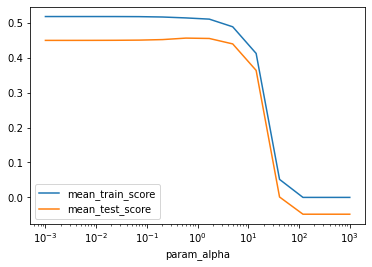

In [86]:
lasso_res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)

In [122]:
def visualize_model_coef(model):
    return plt.scatter(range(X_train.shape[1]), model.coef_, c=np.sign(model.coef_), cmap="bwr_r", edgecolor='k')

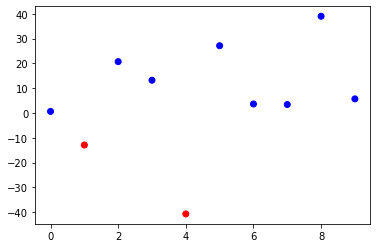

In [93]:
visualize_model_coef(lr)

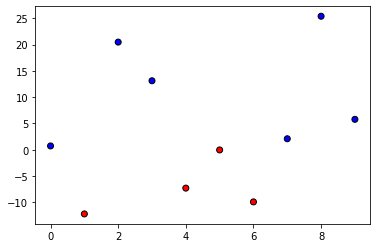

In [124]:
visualize_model_coef(rdg_best)

Lasso(alpha=0.5878016072274912)

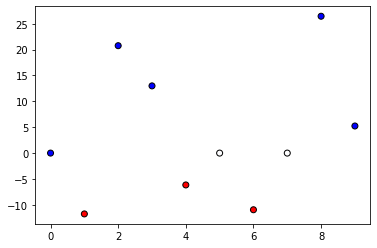

In [125]:
visualize_model_coef(las_best)
las_best

{'alpha': 0.9846652027941231} 0.4566413411328041


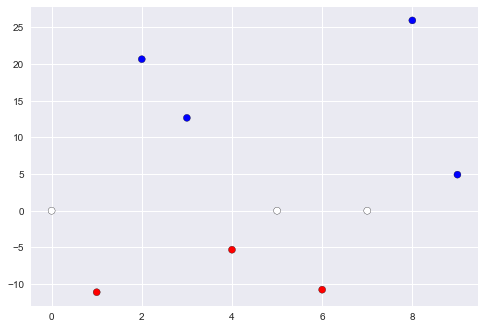

In [129]:
grid = GridSearchCV(Lasso(max_iter =1e6), 
                    param_grid={'alpha': np.logspace(-5, 1, 150)}, 
                    return_train_score=True, 
                    cv=10)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_, grid.best_score_)
visualize_model_coef(grid.best_estimator_)